## Proces eksploracji danych: poznanie danych, wizualizacja, czyszczenie, podstawowe statystyki

Proces eksploracji danych ująć można następująco:

    Zrozumienie danych 
    Przygotowanie danych
    Modelowanie
    Ewaluacja
    Wnioski/Interpretacja i ewentualne powtórzenie procesu eksploracji

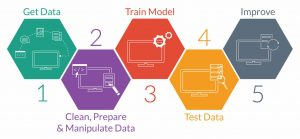

In [4]:
Image(filename='model.png')

Zrozumienie danych to najważniejszy etap eksploracji danych.

Przyjrzyjmy się kilku zbiorom danych:

In [2]:
from sklearn import datasets

Ceny mieszkań w Bostonie (w podziale na obwody): https://scikit-learn.org/stable/datasets/index.html#boston-dataset

In [3]:
housing = datasets.load_boston()

In [4]:
housing['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Dane łatwiej będzie odczytać i przetwarzać w jakiejś formie tabeli...
do tego wykorzystamy bibliotekę pandas

In [5]:
import pandas as pd

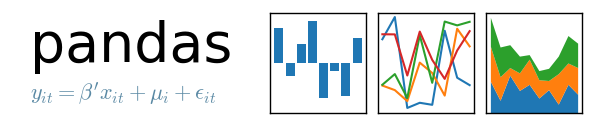

In [13]:
Image('pandas.png')

In [6]:
dane = pd.DataFrame(housing['data'])
dane[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
housing['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
dane = pd.DataFrame(housing['data'], columns = housing['feature_names'])
dane[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
dane['CRIM'][:10]

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
5    0.02985
6    0.08829
7    0.14455
8    0.21124
9    0.17004
Name: CRIM, dtype: float64

In [9]:
cena = pd.DataFrame(housing['target'])
cena[:5]

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Możemy sprawdzić podstawowe statystyki za pomocą funkcji "describe()"

Zacznijmy od cen (mediana w obwodzie w 1000$)

In [19]:
cena.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


Jakie możemy wyciągnąć wnioski? Jaka jest rozpiętość cen w Bostonie?

Sprawdźmy rozkład danych. Możemy to wykonać za pomocą histogramu danych. Najprościej będzie wykorzystać nakładkę seaborn na matplotlib (można też oczywiście użyć samego matplotliba).

In [23]:
import matplotlib.pyplot as plt

Czysty matplotlib: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

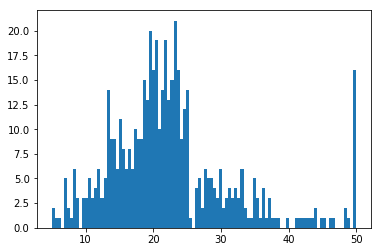

In [28]:
plt.hist(cena.values, bins = 100)
plt.show()

Seaborn: https://seaborn.pydata.org/tutorial/distributions.html

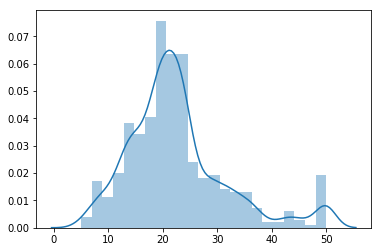

In [33]:
sns.distplot(cena)

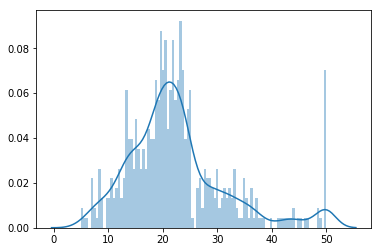

In [36]:
sns.distplot(cena, bins = 100)

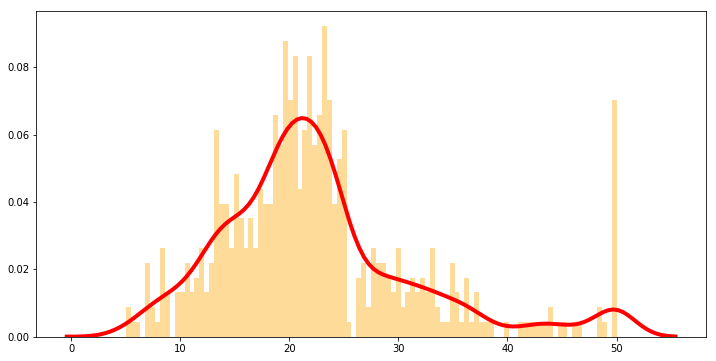

In [52]:
plt.figure(figsize = (12,6))
sns.distplot(cena, bins = 100, kde_kws = {"color": "red", "lw": 4}, hist_kws = {"color": "orange"})

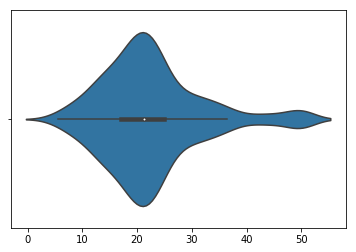

In [117]:
sns.violinplot(cena)
#https://seaborn.pydata.org/generated/seaborn.violinplot.html

Przyjrzyjmy się statystykom dokładniej:

In [58]:
print(cena.mean())
print(cena.median())

0    22.532806
dtype: float64
0    21.2
dtype: float64


In [60]:
from scipy.stats import skew, kurtosis

In [61]:
skew(cena) #skośność

array([1.10481082])

In [63]:
kurtosis(cena)#kurtoza

array([1.46862877])

<h2>By lepiej zrozumieć zasadę działania tych statystyk przyjrzymy się losowo wygenerowanym danym</h2>

In [114]:
import numpy as np
x = np.random.normal(size = 10000) #https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.normal.html#numpy.random.normal
#np.log

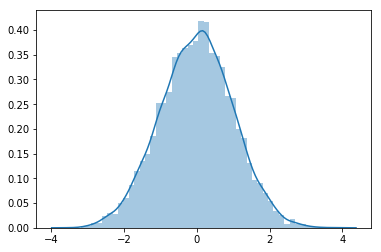

In [115]:
sns.distplot(x)

In [98]:
#zmiana parametrów i statystyk, różne rozkłady (lognormal)

Zadanie 1 do sprawozdania: sprwadź jeden z innych rozkładów gęstości generowany przez numpy - opisz go, policz statystyki, określ jak się one mają do rozkładu normalnego

<h2>Powrót do zbioru z Bostonu</h2>

Przyjrzyjmy się jednej ze statystyk zbioru w podobny sposób co cenom

In [164]:
przest = dane["CRIM"]

In [165]:
przest.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

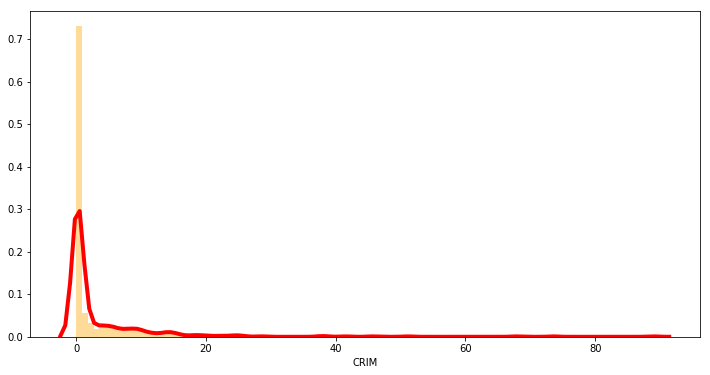

In [166]:
plt.figure(figsize = (12,6))
sns.distplot(przest, bins = 100, kde_kws = {"color": "red", "lw": 4}, hist_kws = {"color": "orange"})

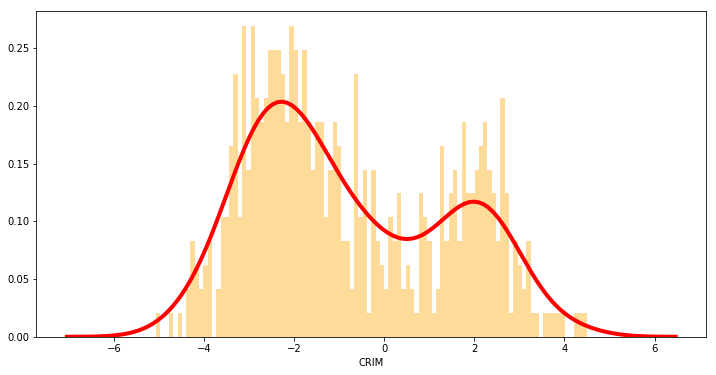

In [167]:
przest_log = np.log(przest)
plt.figure(figsize = (12,6))
sns.distplot(przest_log, bins = 100, kde_kws = {"color": "red", "lw": 4}, hist_kws = {"color": "orange"})

In [171]:
skew(przest_log)

0.40473014342603986

In [172]:
kurtosis(przest_log)

-1.0115821589964373

Zadanie nr 2 do sprawozdania: przeanalizuj wszystkie parametry - który jest zbliżony do rozkładu normalnego? Wybierz 3 parametry i wykorzystując ich opis ze strony (https://scikit-learn.org/stable/datasets/index.html#boston-dataset) postaraj się określić co oznacza rozkład tego parametru w obszarze badań.

<b> Gratis: wszystkie rozkłady w porównaniu do siebie </b>

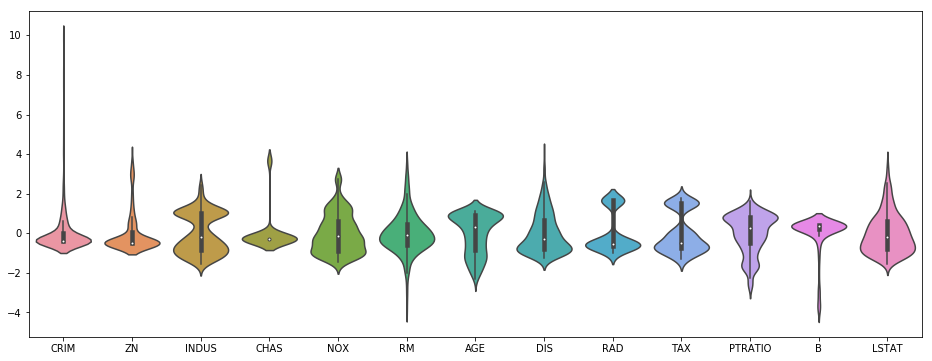

In [192]:
dane_norm = (dane-dane.mean())/dane.std()
plt.figure(figsize = (16,6))
sns.violinplot(data = dane_norm, scale = "width")